In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

mnist = tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

train_images = train_images/255.0
test_images = test_images/255.0

train_labels_ohe = tf.one_hot(train_labels,depth=10).numpy()
test_labels_ohe = tf.one_hot(test_labels,depth=10).numpy()

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape = (28,28)))

model.add(tf.keras.layers.Dense(units = 64,
                               kernel_initializer = 'normal',
                               activation = 'relu'))

model.add(tf.keras.layers.Dense(units = 32,
                               kernel_initializer = 'normal',
                               activation = 'relu'))

model.add(tf.keras.layers.Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [2]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

train_epochs = 10
batch_size = 30

train_history=model.fit(train_images,train_labels_ohe,
                        validation_split =0.2,
                        epochs = train_epochs,
                        batch_size = batch_size,
                        verbose = 2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 - 13s - loss: 0.3542 - accuracy: 0.8974 - val_loss: 0.1854 - val_accuracy: 0.9483
Epoch 2/10
48000/48000 - 11s - loss: 0.1638 - accuracy: 0.9516 - val_loss: 0.1338 - val_accuracy: 0.9612
Epoch 3/10
48000/48000 - 10s - loss: 0.1183 - accuracy: 0.9648 - val_loss: 0.1334 - val_accuracy: 0.9602
Epoch 4/10
48000/48000 - 10s - loss: 0.0913 - accuracy: 0.9724 - val_loss: 0.1149 - val_accuracy: 0.9656
Epoch 5/10
48000/48000 - 11s - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.1090 - val_accuracy: 0.9680
Epoch 6/10
48000/48000 - 10s - loss: 0.0625 - accuracy: 0.9805 - val_loss: 0.1009 - val_accuracy: 0.9729
Epoch 7/10
48000/48000 - 11s - loss: 0.0527 - accuracy: 0.9837 - val_loss: 0.1126 - val_accuracy: 0.9695
Epoch 8/10
48000/48000 - 10s - loss: 0.0441 - accuracy: 0.9853 - val_loss: 0.1084 - val_accuracy: 0.9714
Epoch 9/10
48000/48000 - 10s - loss: 0.0383 - accuracy: 0.9877 - val_loss: 0.1101 - val_accuracy: 0.9719
Epoch

In [3]:
train_history.history

{'loss': [0.3541955072921701,
  0.1638352612356539,
  0.11829462016670732,
  0.09132348636849201,
  0.0743391494556272,
  0.06246924917351862,
  0.05272037839360564,
  0.044084485638122714,
  0.0383345679077911,
  0.034169287425438594],
 'accuracy': [0.89741665,
  0.951625,
  0.9648125,
  0.97241664,
  0.97760415,
  0.9805,
  0.9836875,
  0.98529166,
  0.9876875,
  0.98825],
 'val_loss': [0.18542817250592633,
  0.13384710658108814,
  0.13338011113199172,
  0.11485592674725922,
  0.10898450843422325,
  0.1009317855934205,
  0.11264416496953344,
  0.10840527100135659,
  0.11013837147817868,
  0.11152770044349382],
 'val_accuracy': [0.9483333,
  0.9611667,
  0.9601667,
  0.9655833,
  0.968,
  0.97291666,
  0.9695,
  0.97141665,
  0.9719167,
  0.9701667]}

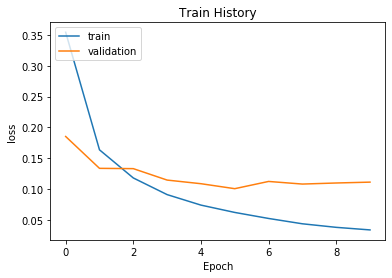

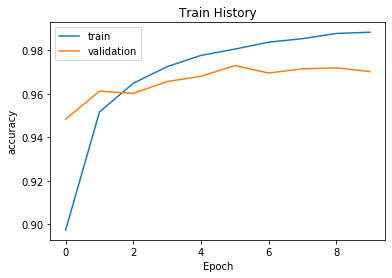

In [4]:
def show_train_history(train_history,train_metric,val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
show_train_history(train_history,'loss','val_loss')
show_train_history(train_history,'accuracy','val_accuracy')

In [5]:
test_loss,test_acc = model.evaluate(test_images,test_labels_ohe,verbose = 2)

10000/1 - 1s - loss: 0.0558 - accuracy: 0.9712


In [7]:
yy = model.evaluate(test_images,test_labels_ohe,verbose = 2)
yy
model.metrics_names

10000/1 - 1s - loss: 0.0558 - accuracy: 0.9712


['loss', 'accuracy']